In [82]:
import os
import sys
import talib as ta
syspath = os.path.split(os.path.abspath("."))[0]
sys.path.append(syspath)
import univ3api.simulation as sim
import univ3api.utils as utils
import importlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# run if simulation file is updated
importlib.reload(sim)

HOST = "mongodb://172.16.11.81:27017/ETHDATA"
source = sim.DataUtilMongoDB(HOST)

from datetime import datetime
import time
d1 = datetime(2021,5,10,9)
d2 = datetime(2021,11,10,9)
t1 = int(time.mktime(d1.timetuple()))
t2 = int(time.mktime(d2.timetuple()))
# print(d1.timetuple())
# print(time.mktime(d1.timetuple()))
# print(int(time.mktime(d1.timetuple())))
# swapdata = source.swap_by_time("SWAP_WETH_USDT_3000", t1, t2)
swapdata = source.swap_by_time("SWAP_WBTC_WETH_3000", t1, t2)
swapdata.tail()
pricedata = swapdata[["timestamp", "sqrtPriceX96"]]
# pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(18, 6).x96_to_price)
pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(8, 18).x96_to_price)

In [83]:
pricedata['datetime'] = pd.to_datetime(pricedata['timestamp'],unit='s')
priceDt = pricedata.set_index('datetime')
priceDt['date'] = list(map(lambda d: d.date(), priceDt.index))
priceDt

,timestamp,sqrtPriceX96,price,date
datetime,,,,
2021-05-10 01:00:57,1620608457,30685129890900272086470739815588235,15.000190,2021-05-10
2021-05-10 01:00:57,1620608457,30709533659969384051347723595723166,15.024059,2021-05-10
2021-05-10 01:03:12,1620608592,30705863068469425277565093729731105,15.020468,2021-05-10
2021-05-10 01:04:43,1620608683,30724919029063427727612188810824282,15.039117,2021-05-10
2021-05-10 01:05:15,1620608715,30722150531496348621299112840911173,15.036406,2021-05-10
...,...,...,...,...
2021-11-09 05:29:33,1636435773,29838382263891094853397020984797412,14.183760,2021-11-09
2021-11-09 05:29:58,1636435798,29830238196962177663795291495427951,14.176019,2021-11-09
2021-11-09 05:36:59,1636436219,29829209673960410593094947881286270,14.175041,2021-11-09


In [84]:
UDP60 = pd.read_csv('../../data/btceth/UDP60.csv',index_col=0)
MA = pd.read_csv('../../data/btceth/MA60.csv',index_col=0)
# MA60 = pd.read_csv('../data/symbolsSig/MA60.csv',index_col=0)
UDP60.dropna(axis = 0,how='any',inplace=True)
UDP60.index = pd.to_datetime(UDP60.index)
udpInd = UDP60.index.tolist()
MA.dropna(axis = 0,how='any',inplace=True)
MA.index = pd.to_datetime(MA.index)
maInd = MA.index.tolist()
# print(type(udpInd[0]))
# str(udpInd[0])[:-6]
strudpInd = [str(ind)[:-6] for ind in udpInd]
strmaInd = [str(ind)[:-6] for ind in maInd]
UDP60.index  = strudpInd
MA.index = strmaInd
# UDP60
MA.columns = ['btcCLOSEoverMA','ethCLOSEoverMA']

In [85]:
udpDict = dict(UDP60['udp60'])
maBTCDict = dict(MA['btcCLOSEoverMA'])
maETHDict = dict(MA['ethCLOSEoverMA'])
udpList = []
maBTCList = []
maETHList =  []
for i, v in priceDt.iterrows():
    k =str(pd.to_datetime(v['date']))
    udpList.append(udpDict[k])
    maBTCList.append(maBTCDict[k])
    maETHList.append(maETHDict[k])
print(f'len of udpList:{len(udpList)}')
priceDt['udp'] = udpList
print(f'len of maBTCList:{len(maBTCList)}')
print(f'len of maETHList:{len(maETHList)}')
priceDt['btcCLOSEoverMA'] = maBTCList
priceDt['ethCLOSEoverMA'] = maETHList

len of udpList:48857
len of maBTCList:48857
len of maETHList:48857


In [86]:
priceDt.drop(['date'],axis=1,inplace=True)
priceDt

,timestamp,sqrtPriceX96,price,udp,btcCLOSEoverMA,ethCLOSEoverMA
datetime,,,,,,
2021-05-10 01:00:57,1620608457,30685129890900272086470739815588235,15.000190,0.6,False,True
2021-05-10 01:00:57,1620608457,30709533659969384051347723595723166,15.024059,0.6,False,True
2021-05-10 01:03:12,1620608592,30705863068469425277565093729731105,15.020468,0.6,False,True
2021-05-10 01:04:43,1620608683,30724919029063427727612188810824282,15.039117,0.6,False,True
2021-05-10 01:05:15,1620608715,30722150531496348621299112840911173,15.036406,0.6,False,True
...,...,...,...,...,...,...
2021-11-09 05:29:33,1636435773,29838382263891094853397020984797412,14.183760,1.0,True,True
2021-11-09 05:29:58,1636435798,29830238196962177663795291495427951,14.176019,1.0,True,True
2021-11-09 05:36:59,1636436219,29829209673960410593094947881286270,14.175041,1.0,True,True


In [87]:
init_price = priceDt["price"][0]

decimal0 = 8 #BTC的精度
decimal1 = 18 #ETH的精度

init_amount0 = 1*1e8 #初始持有BTC的数量
init_amount1 = 0 #初始持有ETH的数量
print('init_price =',init_price)

init_price = 15.000190153257385


In [88]:
import Strategy_btceth_udpMA
importlib.reload(utils)
importlib.reload(sim)
importlib.reload(Strategy_btceth_udpMA)
strategy = Strategy_btceth_udpMA.HoldStrategy(init_amount0, init_amount1, decimal0, decimal1, sim.PoolFee.low, True)
strategy.init(swapdata.iloc[0].to_dict())
# strategy.run(swapdata, priceDt)
strategy.run(swapdata, priceDt)
report = strategy.report()

**********************【创建long池子】【第1次建池】**********************
转换后钱包中余额 amount0:  29965000.0 amount1:  12154653216089452544
price:  17.36737020727188
$$$$$$$【Upper Price】: 22.577581269453443
$$$$$$$【Lower Price】: 12.157159145090315
######【L】:102330343927066【BTC】:29965000【ETH】:6983517050431822848
将要投入池子的数量 amount_t0: 29964999 amount_t1: 6983517050431827968
【RealWorldTime】:2021-07-29 07:05:27, Timestamp: 1627513527, Blocknumber: 12917197
Mint position： Position(L=102283405921906, tick=[255240, 261420], range=[0.0444, 0.0823])
【Mint amount】: token0=0.29964998, token1=6.977927083848456
Wallet amount: token0=2e-08, token1=5.176726132240996
*********************【撤销池子】【原因:btcCLOSEoverMA与ethCLOSEoverMA与udp>0条件不满足】**********************
【btcCLOSEoverMA】 False 【ethCLOSEoverMA】 False 【udp】 -1.0
【RealWorldTime】:2021-09-20 07:19:04,Timestamp: 1632093544, Blocknumber: 13259150
Decreased position： Position(L=0, tick=[255240, 261420], range=[0.0444, 0.0823])
【Decreased amount】: token0=0.55575268, token

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-07-29 07:05:27,0.299650,0.000000,0.000000,0.000000,6.977927,0.000000,0.000000,0.000000
1,2021-07-29 08:16:14,0.299466,0.000000,0.000000,0.000000,6.981126,0.000002,0.000002,0.000002
2,2021-07-29 08:16:23,0.299302,0.000000,0.000000,0.000000,6.983970,0.000001,0.000003,0.000003
3,2021-07-29 08:16:26,0.299136,0.000000,0.000000,0.000000,6.986860,0.000001,0.000004,0.000004
4,2021-07-29 08:16:34,0.298949,0.000000,0.000000,0.000000,6.990110,0.000002,0.000006,0.000006
...,...,...,...,...,...,...,...,...,...
8870,2021-09-20 07:09:43,0.557184,0.000000,0.001273,0.001273,2.930564,0.000002,0.016528,0.016528
8871,2021-09-20 07:10:07,0.556919,0.000000,0.001273,0.001273,2.934333,0.000002,0.016530,0.016530
8872,2021-09-20 07:10:52,0.556335,0.000000,0.001273,0.001273,2.942645,0.000004,0.016534,0.016534
8873,2021-09-20 07:19:04,0.555753,0.000000,0.001273,0.001273,2.950934,0.000004,0.016538,0.016538


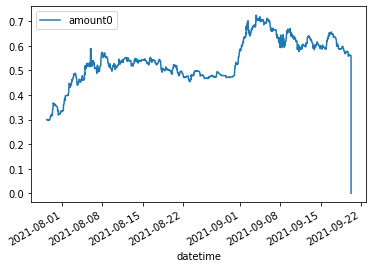

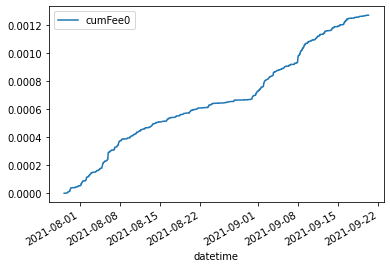

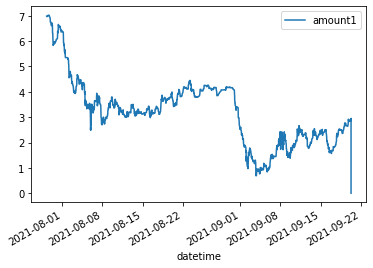

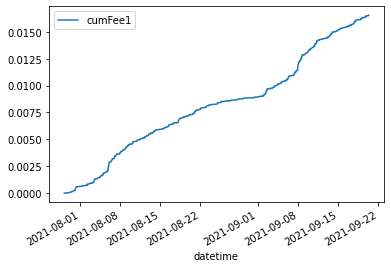

In [89]:
report.positions[1].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-10-01 07:07:57,0.329531,0.000000e+00,0.000000e+00,0.000000e+00,6.411411,0.000000e+00,0.000000e+00,0.000000e+00
1,2021-10-01 08:20:16,0.329522,0.000000e+00,0.000000e+00,0.000000e+00,6.411544,6.640605e-08,6.640605e-08,6.640605e-08
2,2021-10-01 08:28:27,0.329549,1.000000e-08,1.000000e-08,1.000000e-08,6.411141,0.000000e+00,6.640605e-08,6.640605e-08
3,2021-10-01 08:28:48,0.330460,4.500000e-07,4.600000e-07,4.600000e-07,6.397876,0.000000e+00,6.640605e-08,6.640605e-08
4,2021-10-01 08:31:42,0.331733,6.300000e-07,1.090000e-06,1.090000e-06,6.379335,0.000000e+00,6.640605e-08,6.640605e-08
...,...,...,...,...,...,...,...,...,...
999,2021-10-10 07:38:18,0.264425,0.000000e+00,1.459300e-04,1.459300e-04,7.384190,9.337512e-07,2.672707e-03,2.672707e-03
1000,2021-10-10 07:38:54,0.264153,0.000000e+00,1.459300e-04,1.459300e-04,7.388354,2.081941e-06,2.674789e-03,2.674789e-03
1001,2021-10-10 07:40:05,0.263314,0.000000e+00,1.459300e-04,1.459300e-04,7.401196,6.421001e-06,2.681210e-03,2.681210e-03
1002,2021-10-10 07:54:07,0.262479,0.000000e+00,1.459300e-04,1.459300e-04,7.414007,6.405188e-06,2.687615e-03,2.687615e-03


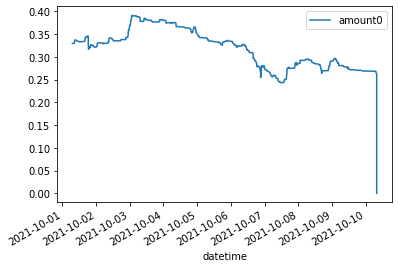

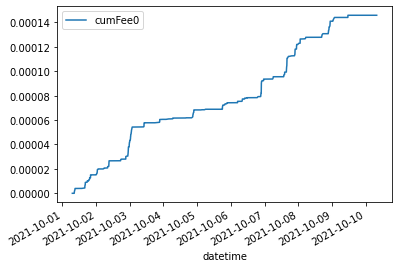

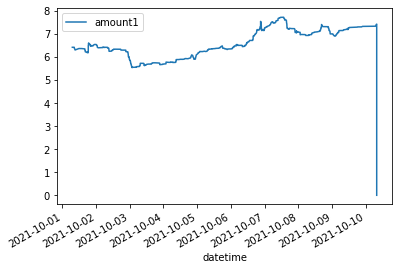

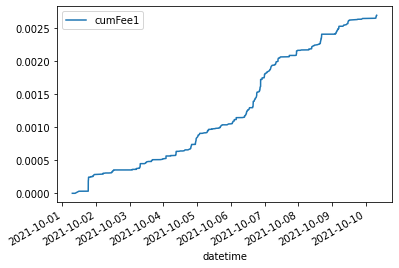

In [90]:
report.positions[2].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-10-11 07:59:09,0.313366,0.000000e+00,0.000000,0.000000,6.654131,0.000000e+00,0.000000,0.000000
1,2021-10-11 08:00:57,0.312735,0.000000e+00,0.000000,0.000000,6.664196,5.032406e-06,0.000005,0.000005
2,2021-10-11 08:01:19,0.312187,0.000000e+00,0.000000,0.000000,6.672928,4.365808e-06,0.000009,0.000009
3,2021-10-11 08:01:59,0.310907,0.000000e+00,0.000000,0.000000,6.693378,1.022506e-05,0.000020,0.000020
4,2021-10-11 08:02:41,0.310792,0.000000e+00,0.000000,0.000000,6.695209,9.155542e-07,0.000021,0.000021
...,...,...,...,...,...,...,...,...,...
3830,2021-11-09 13:28:47,0.467224,1.700000e-07,0.000637,0.000637,4.339800,0.000000e+00,0.008691,0.008691
3831,2021-11-09 13:29:33,0.467627,2.000000e-07,0.000638,0.000638,4.334085,0.000000e+00,0.008691,0.008691
3832,2021-11-09 13:29:58,0.468367,3.700000e-07,0.000638,0.000638,4.323592,0.000000e+00,0.008691,0.008691
3833,2021-11-09 13:36:59,0.468460,4.000000e-08,0.000638,0.000638,4.322267,0.000000e+00,0.008691,0.008691


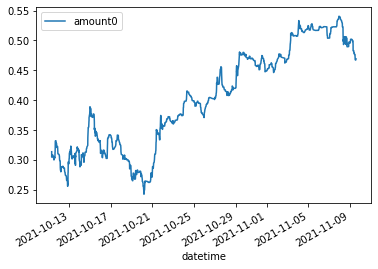

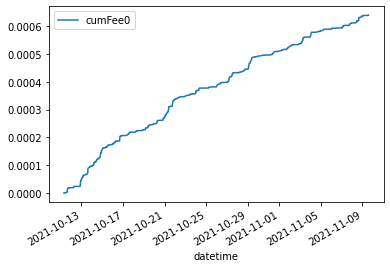

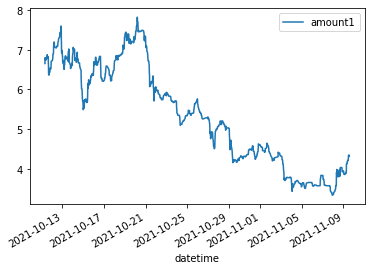

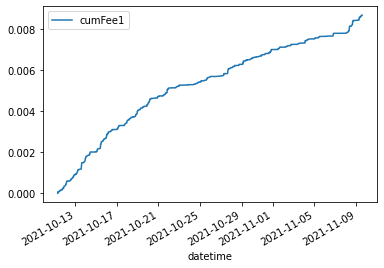

In [91]:
report.positions[3].get_balance(plain=True, draw_plot=True)

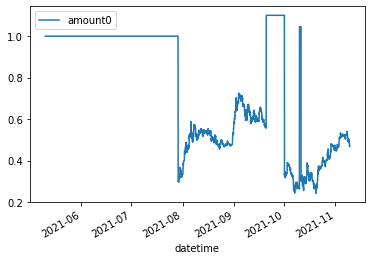

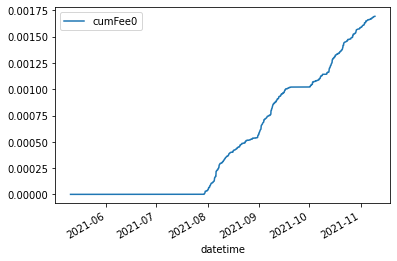

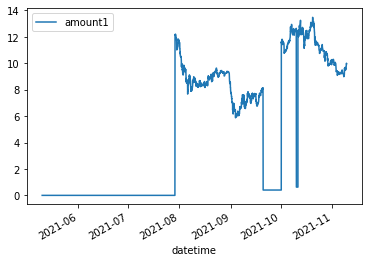

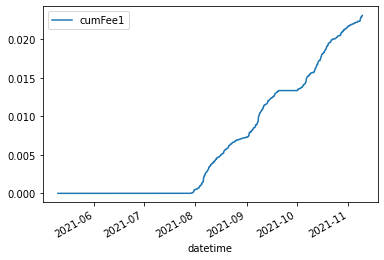

In [92]:
total_balance = report.total_balance(draw_plot=True, plain=True)

<AxesSubplot:>

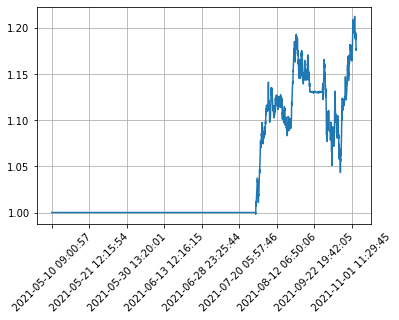

In [93]:
price = pricedata.drop_duplicates("timestamp").set_index("timestamp")["price"]
price
usdc_balance = total_balance.set_index("timestamp")[["amount0", "cumFee0"]].sum(axis=1)
eth_balance = total_balance.set_index("timestamp")[["amount1", "cumFee1"]].sum(axis=1) / price
eth_balance+usdc_balance
# eth_balance.plot()
# usdt_balance.plot()
tb_Timing = (eth_balance+usdc_balance)
tb_Timing_origin = tb_Timing.copy(deep=True)
time_to_print = list(map(time.localtime,tb_Timing.index.tolist()))
time_to_print_2  = [time.strftime('%Y-%m-%d %H:%M:%S', i) for i in time_to_print]
# time_to_print_2  = [time.strftime('%Y-%m-%d', i) for i in time_to_print]
tb_Timing.index = time_to_print_2
tb_Timing.plot(rot = 45,grid=True)